# Download fiji

## skip this cell if you are running it on binder

In [ ]:
%%bash
rm -rf $HOME/Fiji.app
export JAVA_HOME=/srv/conda/envs/notebook
wget https://downloads.imagej.net/fiji/archive/20201104-1356/fiji-linux64.zip
unzip fiji-linux64.zip -d $HOME
# fix FilamentDetector issue
mv $HOME/Fiji.app/jars/FilamentDetector-1.0.0.jar $HOME/Fiji.app/jars/FilamentDetector-1.0.0.jar.disabled
python3 -c "import imagej;ij = imagej.init('$HOME/Fiji.app');print('pyimagej initialized.')"

# ImageJ with Python Kernel

This notebook covers how to use ImageJ as a library from Python. A major advantage of this approach is the ability to combine ImageJ with other tools available from the Python software ecosystem, including [NumPy](https://www.numpy.org/), [SciPy](https://www.scipy.org/), [scikit-image](https://scikit-image.org/), [CellProfiler](https://cellprofiler.org/), [OpenCV](https://opencv.org/), [ITK](https://itk.org/) and more.

This notebook assumes familiarity with the ImageJ API. Detailed tutorials in that regard can be found in the [other notebooks](../ImageJ-Tutorials-and-Demo.ipynb).

# Installing N2V in Fiji

In [28]:
%%bash
$HOME/Fiji.app/ImageJ-linux64 --update add-update-site Noise2Void https://sites.imagej.net/CSBDeep/
$HOME/Fiji.app/ImageJ-linux64 --update update
wget https://github.com/juglab/N2V_fiji/blob/master/src/test/resources/blobs.tif?raw=true -O input.tif
wget https://github.com/juglab/N2V_fiji/blob/master/src/test/resources/format-0.2.0-csbdeep.bioimage.io.zip?raw=true -O format-0.2.0-csbdeep.bioimage.io.zip

OpenJDK 64-Bit Server VM warning: ignoring option PermSize=128m; support was removed in 8.0
OpenJDK 64-Bit Server VM warning: Using incremental CMS is deprecated and will likely be removed in a future release
Updating the index of available files (Updating from ImageJ site: https://u...
Updating from ImageJ site: https://update.imagej.net/ done
Updating the index of available files (Updating from Fiji site: https://upd...
Updating from Fiji site: https://update.fiji.sc/ done
Updating from Java-8 site: https://sites.imagej.net/Java-8/ done
Updating the index of available files (Updating from Noise2Void site: https...
Updating from Noise2Void site: https://sites.imagej.net/CSBDeep/ done
................................................................................
................................................................................
................................................................................
...............................................................

## Starting ImageJ from Python

The [pyimagej](https://pypi.org/project/pyimagej/) module enables access to the entire ImageJ API from Python in a natural way.

Let's initialize an ImageJ gateway including Fiji plugins, at a reproducible version:

In [2]:
import imagej
import os
ij = imagej.init(os.path.expanduser("~") + '/Fiji.app',headless=True)
ij.getVersion()

'2.1.0/1.53c'

In [45]:
modelPath = "/home/jovyan/format-0.2.0-csbdeep.bioimage.io.zip"
inputPath = "/home/jovyan/input.tif"
outputPath = "/home/jovyan/output.tif"
args = { 
    'training': '/home/jovyan/input.tif',
    'prediction': '/home/jovyan/input.tif',
    'output': output,
    'axes': 'XY',
    'mode3d': False,
    'numepochs': 2,
    'numstepsperepoch': 4,
    'batchsize': 8,
    'patchshape': 16,
    'neighborhoodradius': 5
}
modelzoo_service = ij.context().getService('net.imagej.modelzoo.ModelZooService')
model = modelzoo_service.io().open(modelPath)
img = ij.io().open(inputPath)
output = modelzoo_service.predict(model, img, args['axes'])
dataset = ij.dataset().create(output.get('output'))
ij.io().save(dataset, outputPath)

[java.lang.Enum.toString] [INFO] null = net.imagej.modelzoo.consumer.DefaultModelZooPrediction@3b42121d
[java.lang.Enum.toString] [INFO] Using default TensorFlow version from JAR: TF 1.15.0 CPU
[java.lang.Enum.toString] [INFO] Loading TensorFlow model Fri_Aug_07_19-50-38_CEST_2020_last_checkpoint_1620404190507 from source file file:/home/jovyan/format-0.2.0-csbdeep.bioimage.io.zip
[java.lang.Enum.toString] [INFO] Model inputs: {input=name: "input:0" dtype: DT_FLOAT tensor_shape {   dim {     size: -1   }   dim {     size: -1   }   dim {     size: -1   }   dim {     size: 1   } } }
[java.lang.Enum.toString] [INFO] Model outputs: {output=name: "activation_11/Identity:0" dtype: DT_FLOAT tensor_shape {   dim {     size: -1   }   dim {     size: -1   }   dim {     size: -1   }   dim {     size: 1   } } }
[java.lang.Enum.toString] Input dimensions: [256, 256, 1, 1][java.lang.Enum.toString] 
[java.lang.Enum.toString] Axes: [X, Y, Channel, Time][java.lang.Enum.toString] 
[java.lang.Enum.toStri

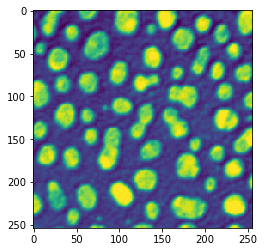

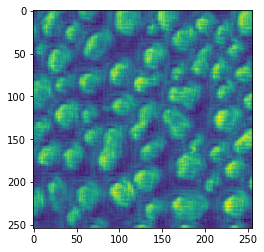

In [46]:
img = ij.io().open(inputPath)
ij.py.show(img)
img = ij.io().open(outputPath)
ij.py.show(img)